In [2]:
from xgboost import XGBClassifier
from research.logreg import (
    fit_and_score, show_pred, make_train_test, classification_report, make_pipeline,
    PolynomialFeatures, StandardScaler, pred_grid, make_grid
)
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
train_test = X_train, X_test, y_train, y_test = make_train_test()

In [168]:
n = 20
xgbs = [XGBClassifier(random_state=r, subsample=0.3, reg_lambda=10) for r in range(100, 100+n)]
for xgb in xgbs:
    xgb.fit(X_train, y_train)

In [169]:
def pred_grid_xgbs(models, x_min, x_max, y_min, y_max, n):
    x_grid, y_grid, xy_flat = make_grid(x_min, x_max, y_min, y_max, n)
    scores = np.array([xgb.predict_proba(xy_flat)[:,1] for xgb in models]).mean(axis=1)
    return x_grid, y_grid, scores.reshape(x_grid.shape)

In [170]:
print(classification_report(y_true=y_train, y_pred=xgbs[1].predict(X_train)))
print(classification_report(y_true=y_test, y_pred=xgbs[1].predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       456
           1       0.98      0.98      0.98       444

   micro avg       0.98      0.98      0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.98      0.99        56

   micro avg       0.99      0.99      0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



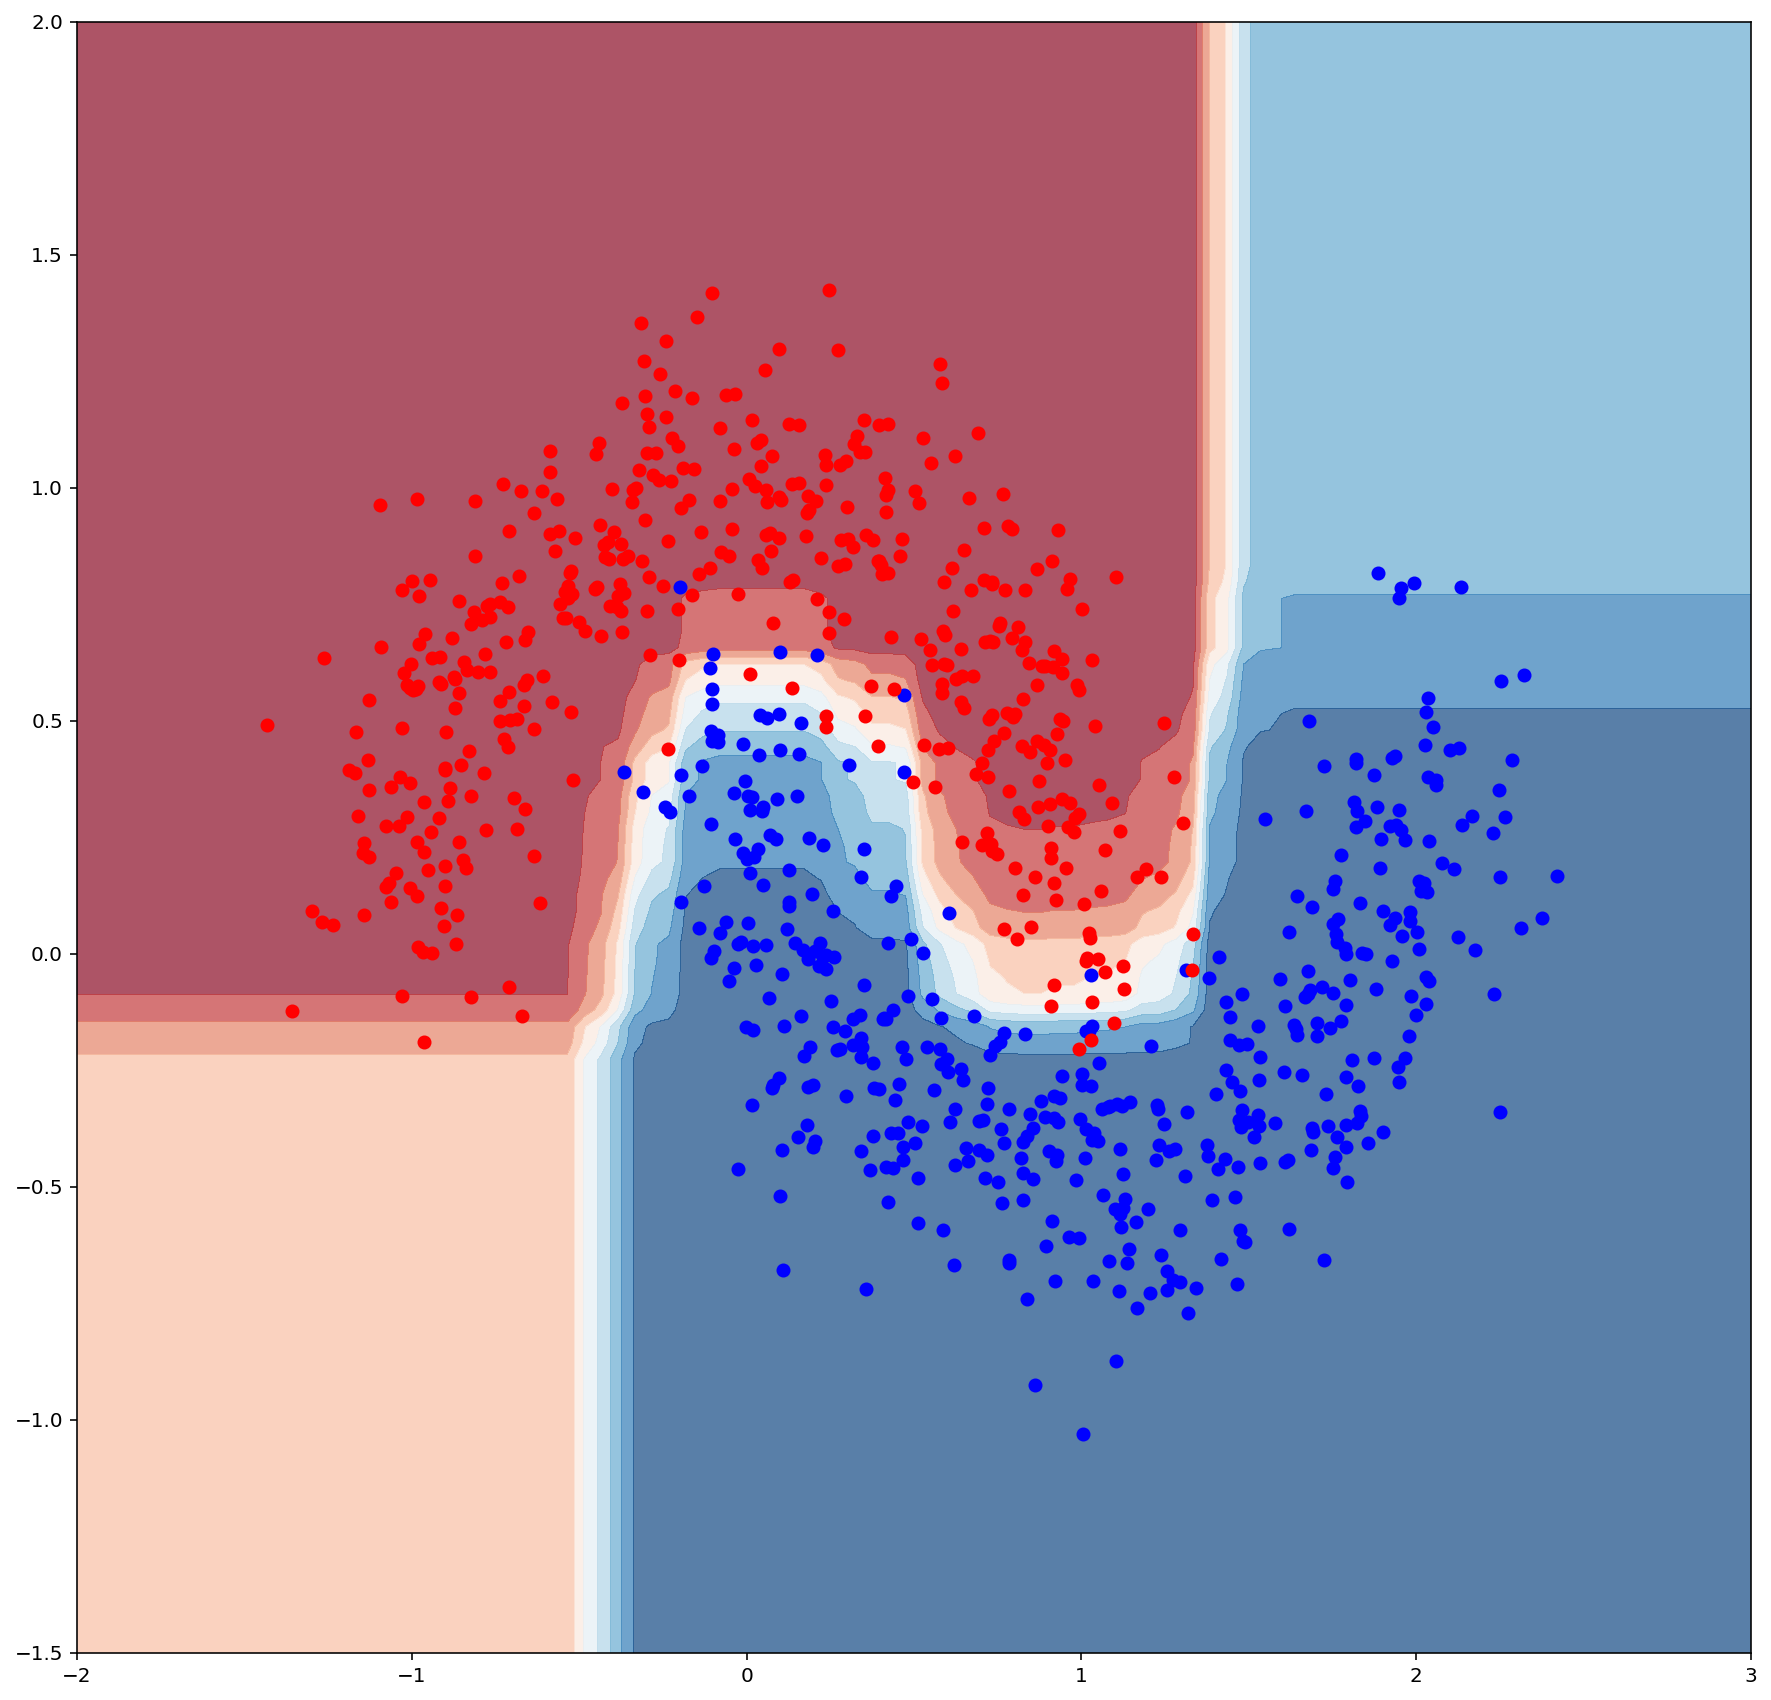

In [174]:
lrbt = -2.0, 3.0, -1.5, 2.0
x_grid, y_grid, scores = pred_grid_xgb(xgbs[:1], *lrbt, 100)
show_pred(X_train, y_train, x_grid, y_grid, scores)